In [5]:
import torch
torch.cuda.empty_cache()
torch.manual_seed(42)

In [6]:
mode = "ebae"
# mode = "ebae-ebar"

In [7]:
model_name = 'Qwen/Qwen2.5-0.5B-Instruct'
# model_name = "meta-llama/Llama-3.2-1B"

In [8]:
import pickle

if mode == "ebae":
    # read chunks using pickle
    with open("wiki_chunks_list_ebae.pkl", "rb") as f:
        chunks = pickle.load(f)

elif mode == "ebae-ebar":
    with open("wiki_chunks_list_ebae_ebar.pkl", "rb") as f:
        chunks = pickle.load(f)

    with open("wiki_next_sentences_list_ebae_ebar.pkl", "rb") as f:
        next_sentences = pickle.load(f)
else:
    raise ValueError("Invalid mode")

Train the model only with train data on a step-basis. In the paper, they performed 10k steps. Using Qwen 0.5B, the training using approx. 5.5k chunks occupies 22.7GB GPU, with batch_size of 4 and gradient accumulation steps of 8.

In [9]:
from train_ebae import train_steps
from train_hf import main

model_name = 'Qwen/Qwen2.5-0.5B-Instruct'

# train_steps(
#     model_name=model_name,
#     chunks=chunks,
#     next_sentences=next_sentences,
#     seq_length=1024,
#     batch_size=4,
#     learning_rate=1e-6,
#     epochs=3
# )

main(
    model_name=model_name,
    chunks=chunks,
    seq_length=1024,
    batch_size=4,
    learning_rate=1e-6,
    epochs=3
)


RuntimeError: CUDA error: out of memory
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


In [ ]:
# import re
# import matplotlib.pyplot as plt

# # File path (update this with the actual path of your .txt file)
# file_path = "output.log"

# # Lists to store extracted loss values
# ebae_losses = []
# ebar_losses = []

# # Regular expression to match loss values
# loss_pattern = re.compile(r"EBAE loss: ([\d.]+), EBAR loss: ([\d.]+)")

# # Read and extract losses
# with open(file_path, "r") as file:
#     for line in file:
#         match = loss_pattern.search(line)
#         if match:
#             ebae_losses.append(float(match.group(1)))
#             ebar_losses.append(float(match.group(2)))

# # Plotting the losses
# plt.figure(figsize=(10, 5))
# plt.plot(ebae_losses, label="EBAE Loss", marker="o", linestyle="-")
# plt.plot(ebar_losses, label="EBAR Loss", marker="s", linestyle="--")
# plt.xlabel("Iteration")
# plt.ylabel("Loss Value")
# plt.title("EBAE and EBAR Loss Over Iterations")
# plt.legend()
# plt.grid()

# # Show plot
# plt.show()

{0: [9.074258208274841, 6.984605371952057, 6.820354640483856, 6.605343580245972, 6.370923340320587, 6.209018647670746, 6.337730705738068, 6.1252776980400085, 5.706455051898956, 5.589846432209015, 5.718905687332153, 5.569788634777069, 5.208417177200317, 5.7077972292900085, 5.741825997829437, 5.583305716514587, 5.612015545368195, 5.642836093902588, 5.475978910923004, 5.433856189250946, 5.415271699428558, 5.350136458873749, 5.446239352226257, 5.3743696212768555, 5.41161435842514, 5.541549861431122, 5.046688556671143, 5.181333601474762, 4.973932564258575, 5.13117653131485, 5.056022644042969, 4.94245707988739, 4.905531585216522, 5.158354759216309, 5.414320468902588, 4.729110419750214, 4.4251269698143005, 4.743887841701508, 4.724220037460327, 4.335347384214401, 4.720021963119507, 4.572705447673798, 4.489868015050888, 4.740679502487183, 4.522029161453247, 4.276280432939529, 4.041342169046402, 4.094541400671005, 4.203373581171036, 4.112515509128571, 4.1738258600234985, 4.475304543972015, 4.118

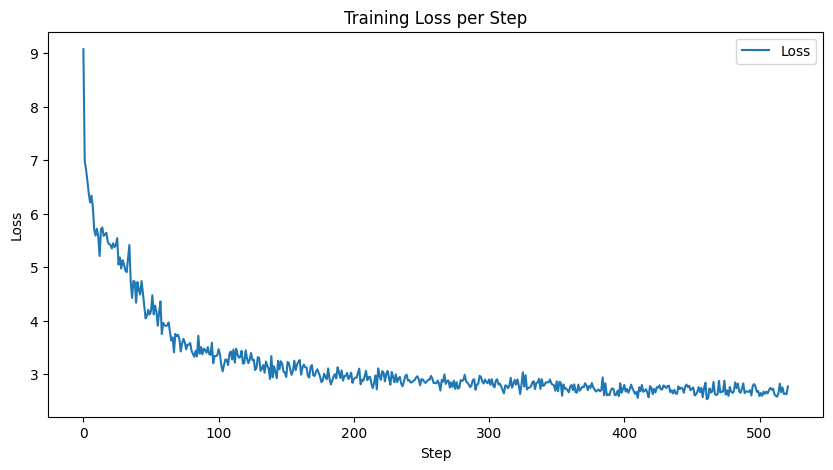

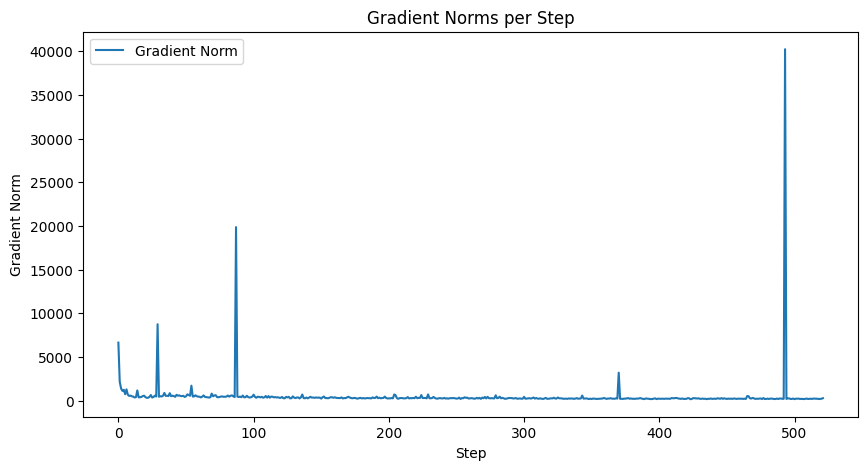

In [ ]:
# import matplotlib.pyplot as plt
# import torch

# # Load saved data
# data = torch.load("training_metrics.pth")
# losses_dict = data["losses"]
# gradient_norms_dict = data["gradient_norms"]

# losses = []
# for epoch, loss_list in losses_dict.items():
#     losses.extend(loss_list)

# gradient_norms = []
# for epoch, gradient_norm_list in gradient_norms_dict.items():
#     gradient_norms.extend(gradient_norm_list)

# # Move gradient norms to CPU if they are GPU tensors
# gradient_norms = [g.cpu().item() if isinstance(g, torch.Tensor) else g for g in gradient_norms]

# # Plot Loss
# plt.figure(figsize=(10, 5))
# plt.plot(losses, label='Loss')
# plt.xlabel('Step')
# plt.ylabel('Loss')
# plt.title('Training Loss per Step')
# plt.legend()
# plt.show()

# # Plot Gradient Norms
# plt.figure(figsize=(10, 5))
# plt.plot(gradient_norms, label='Gradient Norm')
# plt.xlabel('Step')
# plt.ylabel('Gradient Norm')
# plt.title('Gradient Norms per Step')
# plt.legend()
# plt.show()


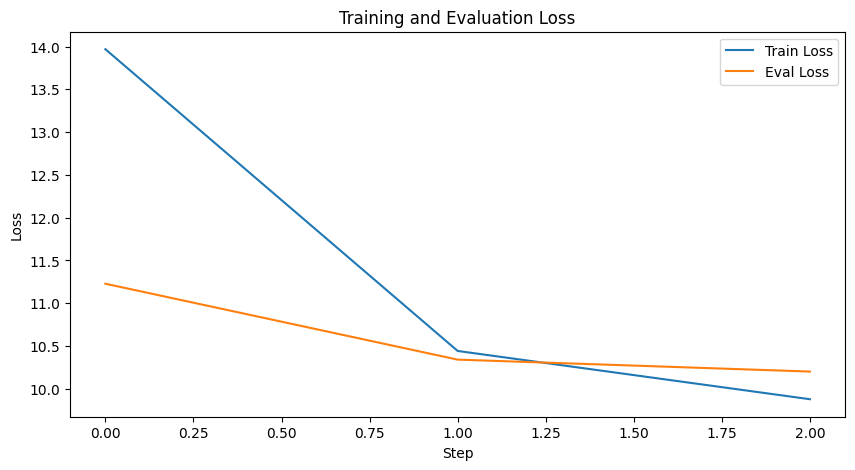

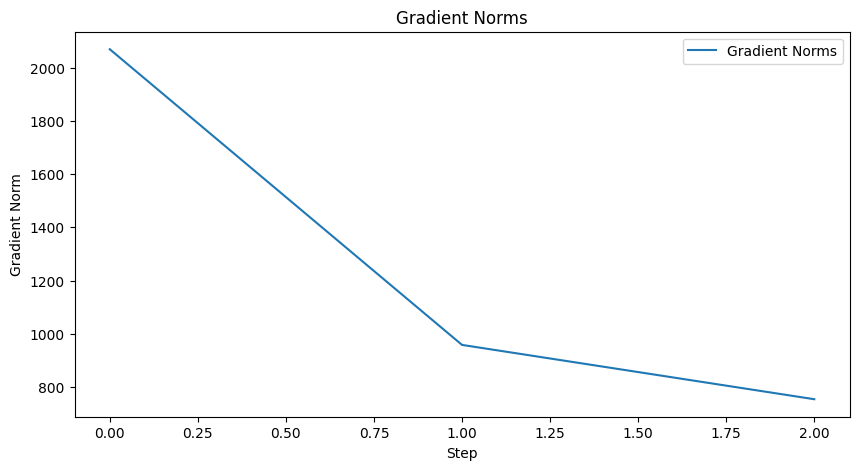

In [1]:
import torch
import matplotlib.pyplot as plt

# Load saved log history from the HF Trainer.
# This file should contain a list of dictionaries with logged metrics.
log_history = torch.load("training_metrics_hf.pth")

# Initialize lists to store metrics
train_losses = []
eval_losses = []
grad_norms = []

# Iterate over each log entry and extract the metrics.
for entry in log_history:
    # Check if a training loss is logged.
    if "loss" in entry:
        train_losses.append(entry["loss"])
    # Check if an evaluation loss is logged.
    if "eval_loss" in entry:
        eval_losses.append(entry["eval_loss"])
    # Check if a gradient norm is logged.
    if "grad_norm" in entry:
        grad_norms.append(entry["grad_norm"])

# Plot training losses and evaluation losses in one plot.
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label="Train Loss")
plt.plot(eval_losses, label="Eval Loss")
plt.xlabel("Step")
plt.ylabel("Loss")
plt.title("Training and Evaluation Loss")
plt.legend()
plt.show()

# Plot gradient norms in a separate plot.
plt.figure(figsize=(10, 5))
plt.plot(grad_norms, label="Gradient Norms")
plt.xlabel("Step")
plt.ylabel("Gradient Norm")
plt.title("Gradient Norms")
plt.legend()
plt.show()


In [ ]:
# from transformers import AutoModelForCausalLM, AutoTokenizer, AutoConfig
# from huggingface_hub import HfApi, HfFolder, Repository

# # Replace these with your paths and model name
# model_path = "./ebar-ebae-model"
# model_name = "leon-hecht/Qwen-2.5-0.5B-Instruct-spanish-ir"

# # Push the model to the Hugging Face Hub
# from transformers import AutoModelForCausalLM

# # Load model
# model = AutoModelForCausalLM.from_pretrained(model_path)
# tokenizer = AutoTokenizer.from_pretrained(model_path)

# # Push the model and tokenizer
# # model.push_to_hub(model_name)
# # tokenizer.push_to_hub(model_name)


/home/leon/tesis/spanish-legal-ir/myenv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
model.safetensors: 100%|██████████| 1.98G/1.98G [03:07<00:00, 10.5MB/s]
tokenizer.json: 100%|██████████| 11.4M/11.4M [00:01<00:00, 10.2MB/s]


CommitInfo(commit_url='https://huggingface.co/leon-hecht/Qwen-2.5-0.5B-Instruct-spanish-ir/commit/1c0c204b553f304774193820e4ca685f018a1495', commit_message='Upload tokenizer', commit_description='', oid='1c0c204b553f304774193820e4ca685f018a1495', pr_url=None, repo_url=RepoUrl('https://huggingface.co/leon-hecht/Qwen-2.5-0.5B-Instruct-spanish-ir', endpoint='https://huggingface.co', repo_type='model', repo_id='leon-hecht/Qwen-2.5-0.5B-Instruct-spanish-ir'), pr_revision=None, pr_num=None)